you will run 'flask run' in terminal. in the directory of flask application.

then you go to the 'http://127.0.0.1:5000/plot'

and you see this:

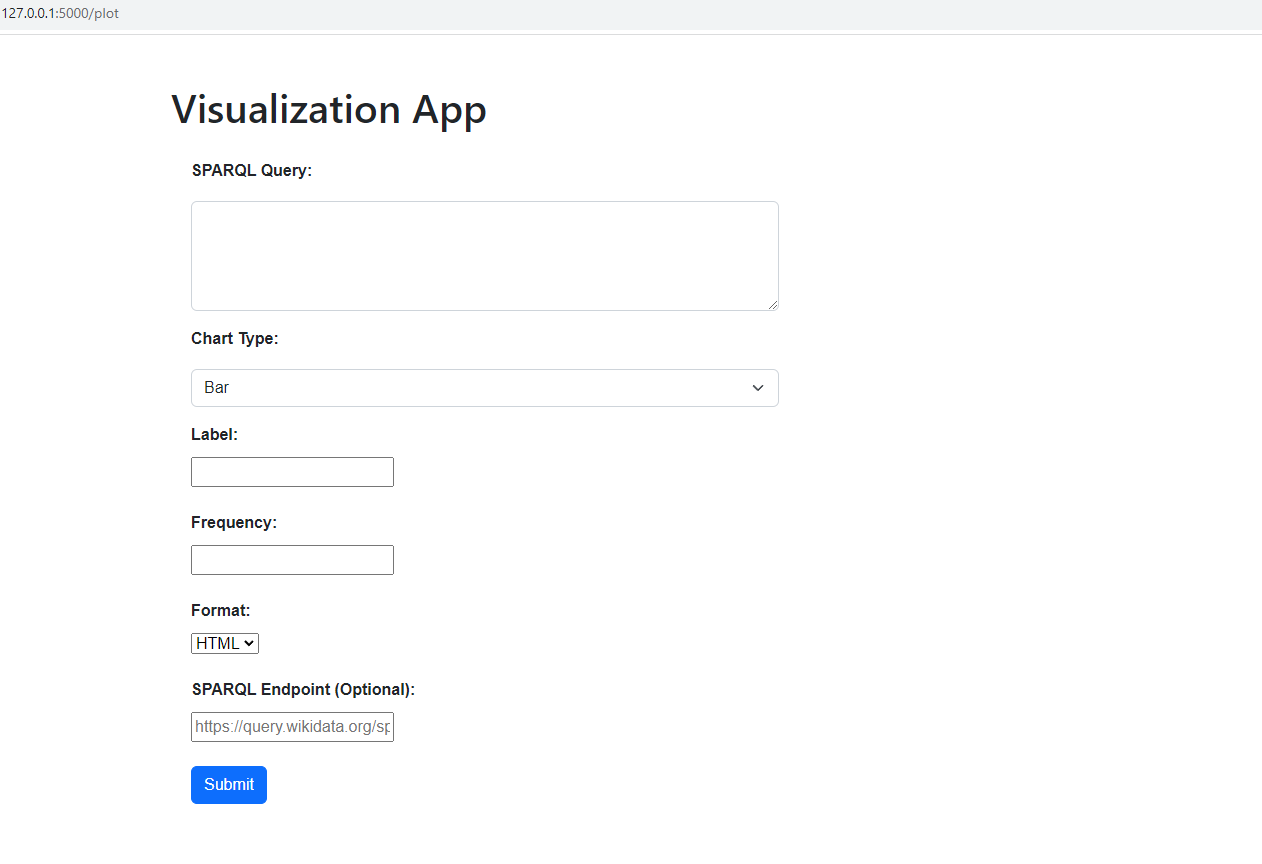

To compute the total population for each continent

```
SELECT ?continent ?continentLabel (SUM(?population) AS ?totalPopulation)
WHERE {
  ?continent wdt:P31 wd:Q5107 .
  ?country wdt:P30 ?continent .
  ?country wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?continent ?continentLabel
HAVING (BOUND(?totalPopulation))
```

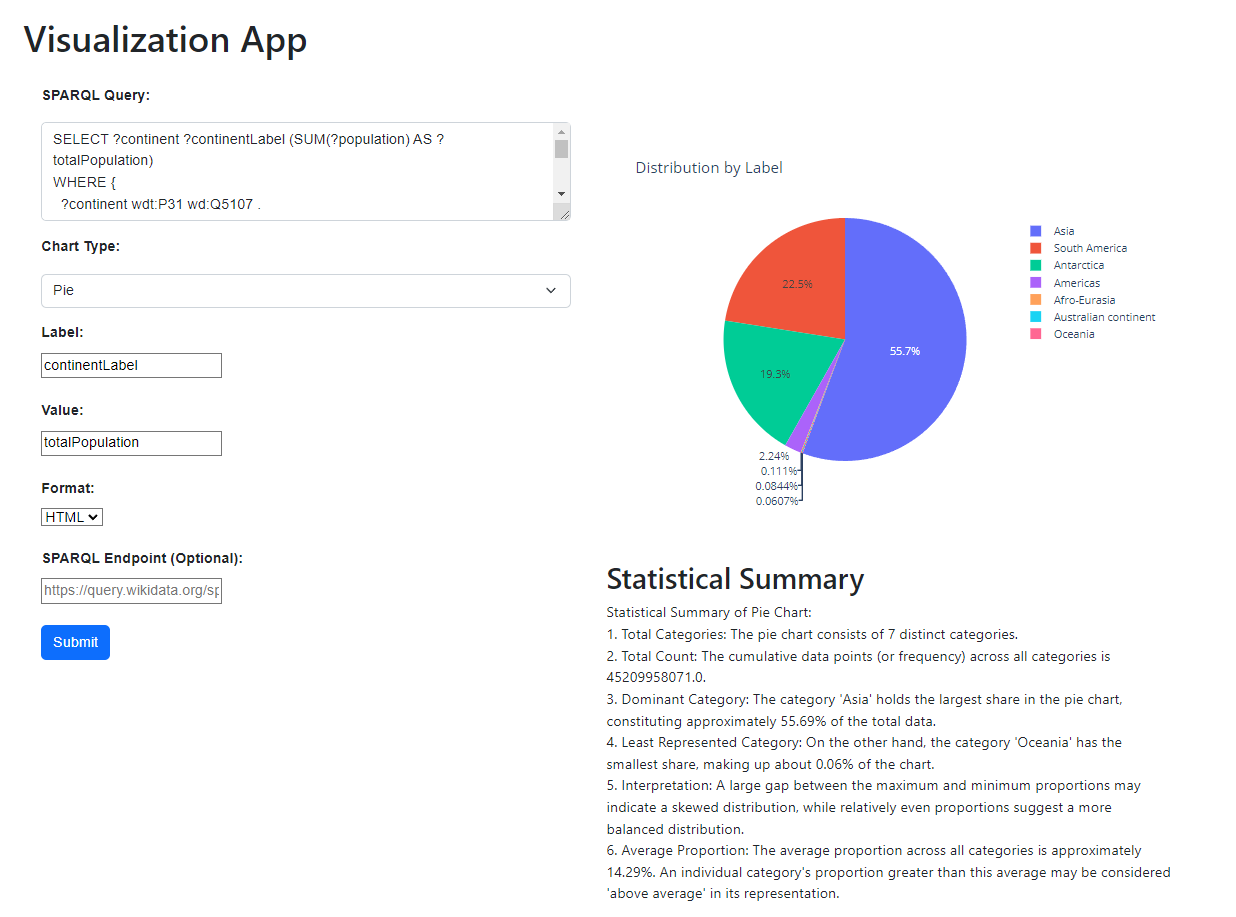

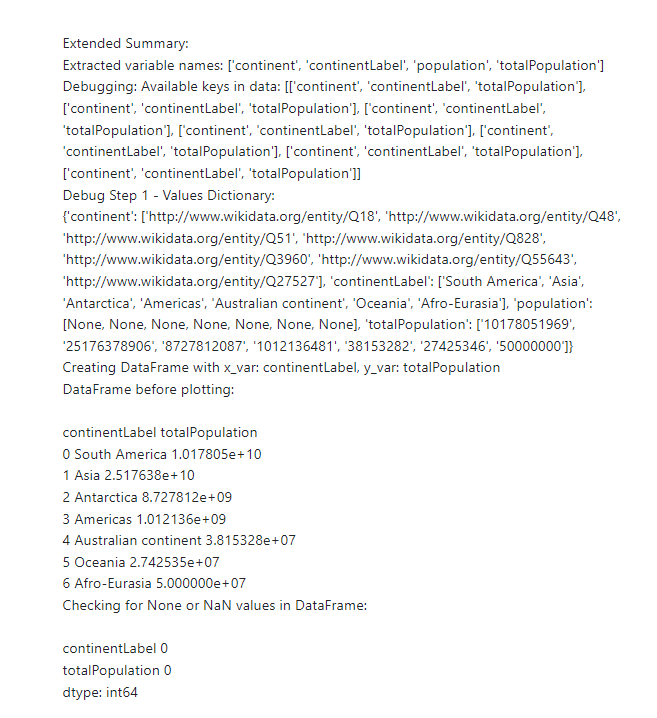

To count the number of Academy Award winners based on their gender:
```
SELECT ?personGender (COUNT(DISTINCT ?personItem) AS ?numberOfWinners)
WHERE {
  ?personAwardItem wdt:P31 wd:Q19020 . # Academy Award
  ?personItem wdt:P166 ?personAwardItem .
  OPTIONAL { ?personItem wdt:P21 ?personGenderItem . }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" .
                           ?personGenderItem rdfs:label ?personGender . }
}
GROUP BY ?personGender
ORDER BY ?personGender
```

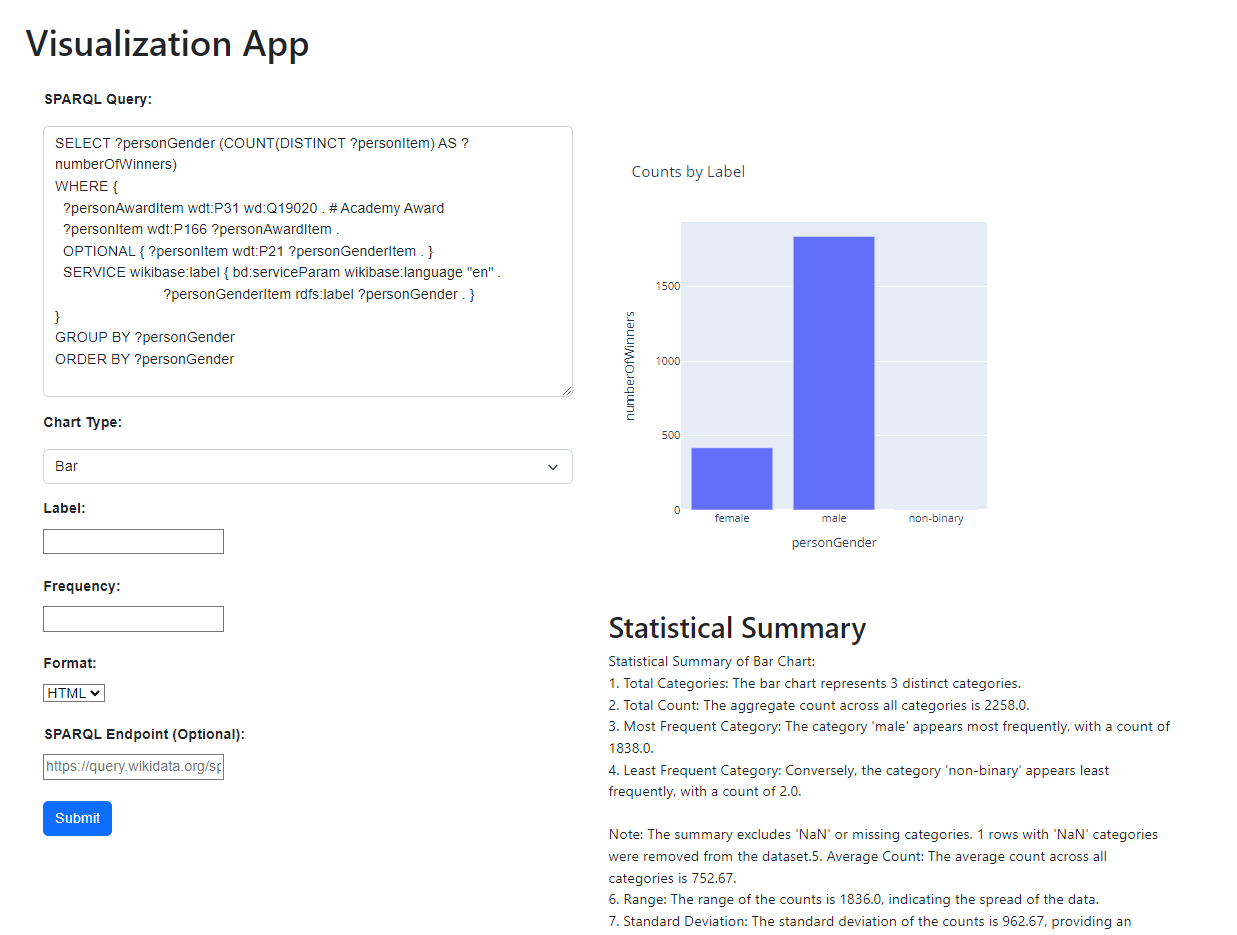

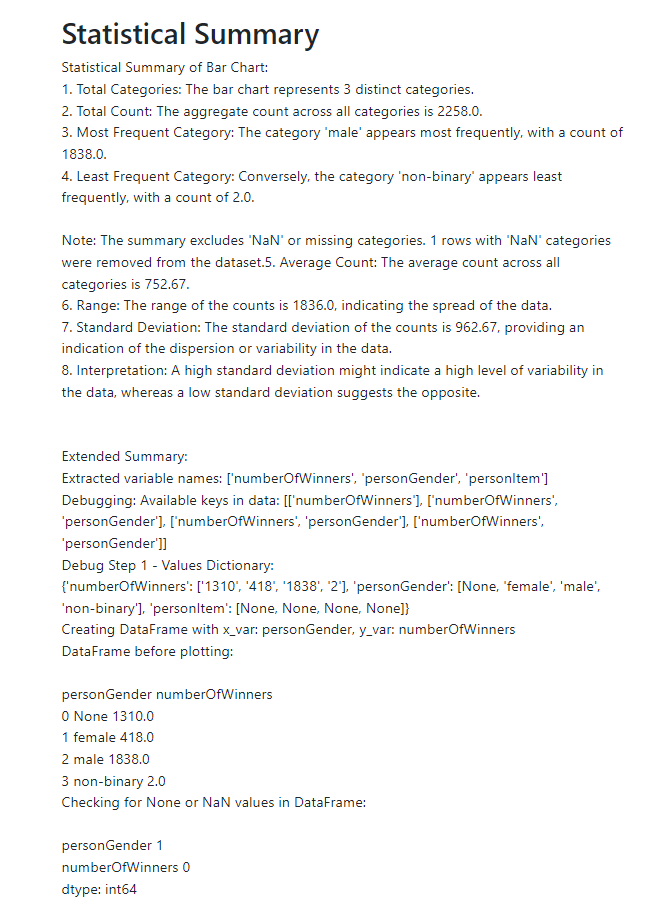

The problem you may encounter in repeating the same query in short time:

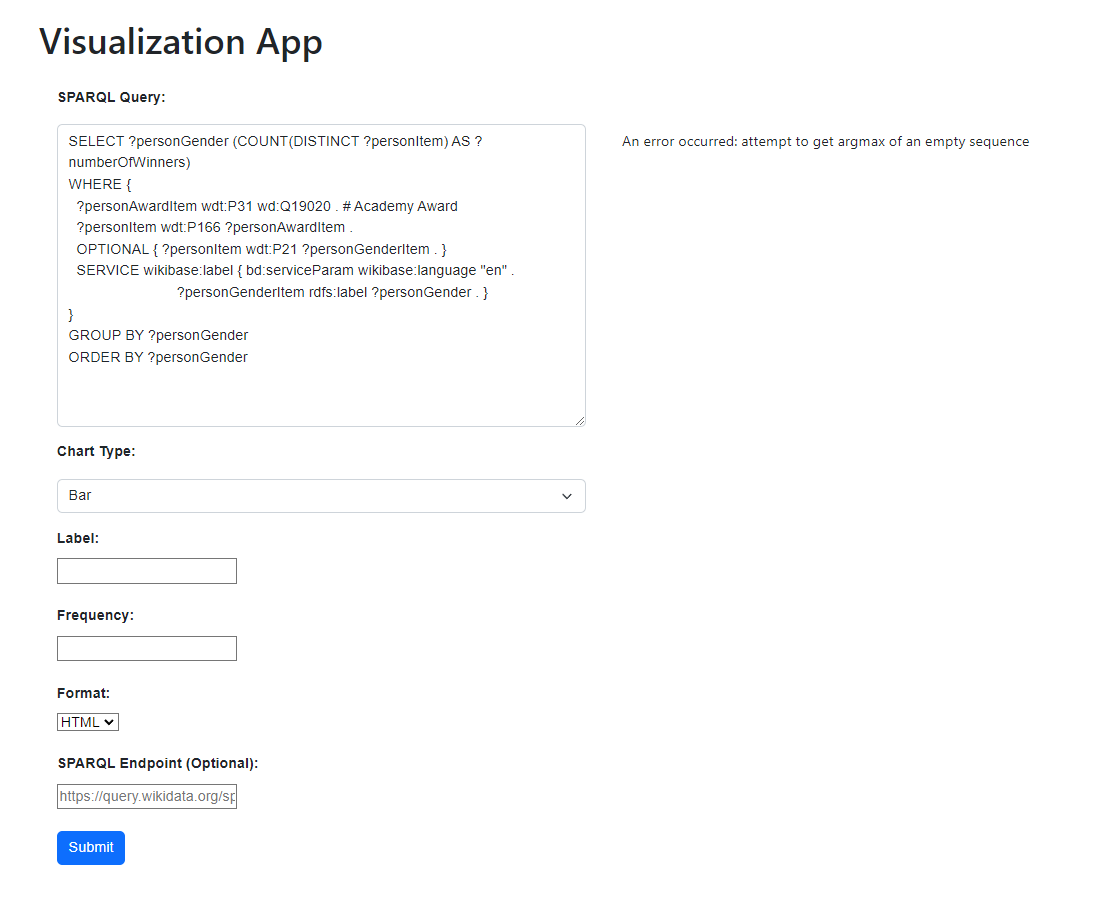

You created a personal graph database using Blazegraph, and you used its endpoint for example 'http://localhost:9999/blazegraph/namespace/myTest/sparql'. 
To query Open Access Status.
```
PREFIX ex: <http://example.org/>
SELECT ?open_access_status (COUNT(?ep_id) as ?count) WHERE {
    ?ep_id ex:Open_Access ?open_access_status .
    FILTER(?open_access_status = "True" || ?open_access_status = "Unknown")
}
GROUP BY ?open_access_status

```

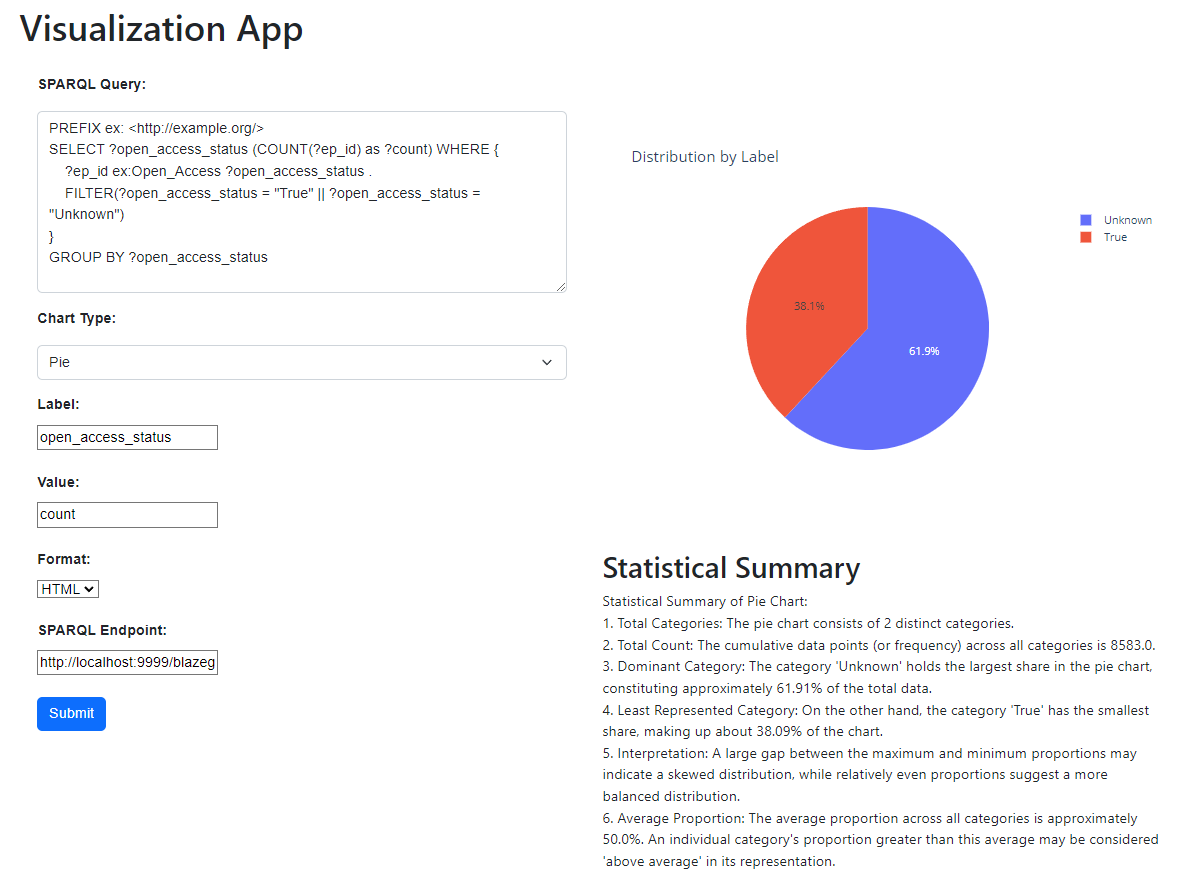

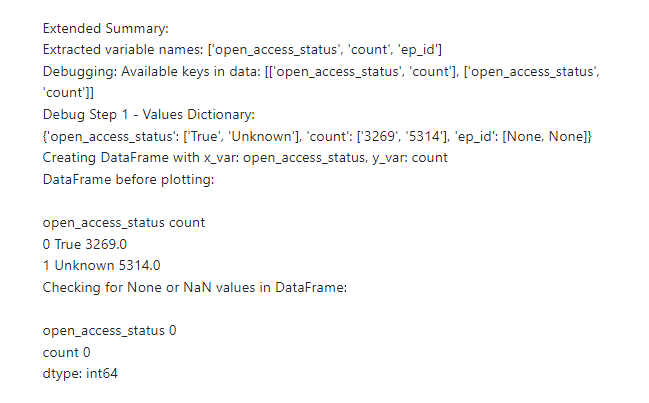

The query in question aims to collect data on the area, the number of languages spoken, and the country label for each country that is a member of ASEAN (wd:Q7768), Association of Southeast Asian Nations. The query is composed of two sub-queries that are implicitly joined.
```
SELECT ?area ?languages ?countryLabel WHERE {
  {
    SELECT DISTINCT ?country ?countryLabel ?area WHERE {
      ?country wdt:P463 wd:Q7768;
                wdt:P2046 ?area.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
    GROUP BY ?country ?countryLabel ?area
  }
  {
    SELECT DISTINCT ?country ?countryLabel (COUNT(?language) AS ?languages) WHERE {
      ?country wdt:P463 wd:Q7768;
                wdt:P2936 ?language.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
    GROUP BY ?country ?countryLabel ?languages
  }
}
```

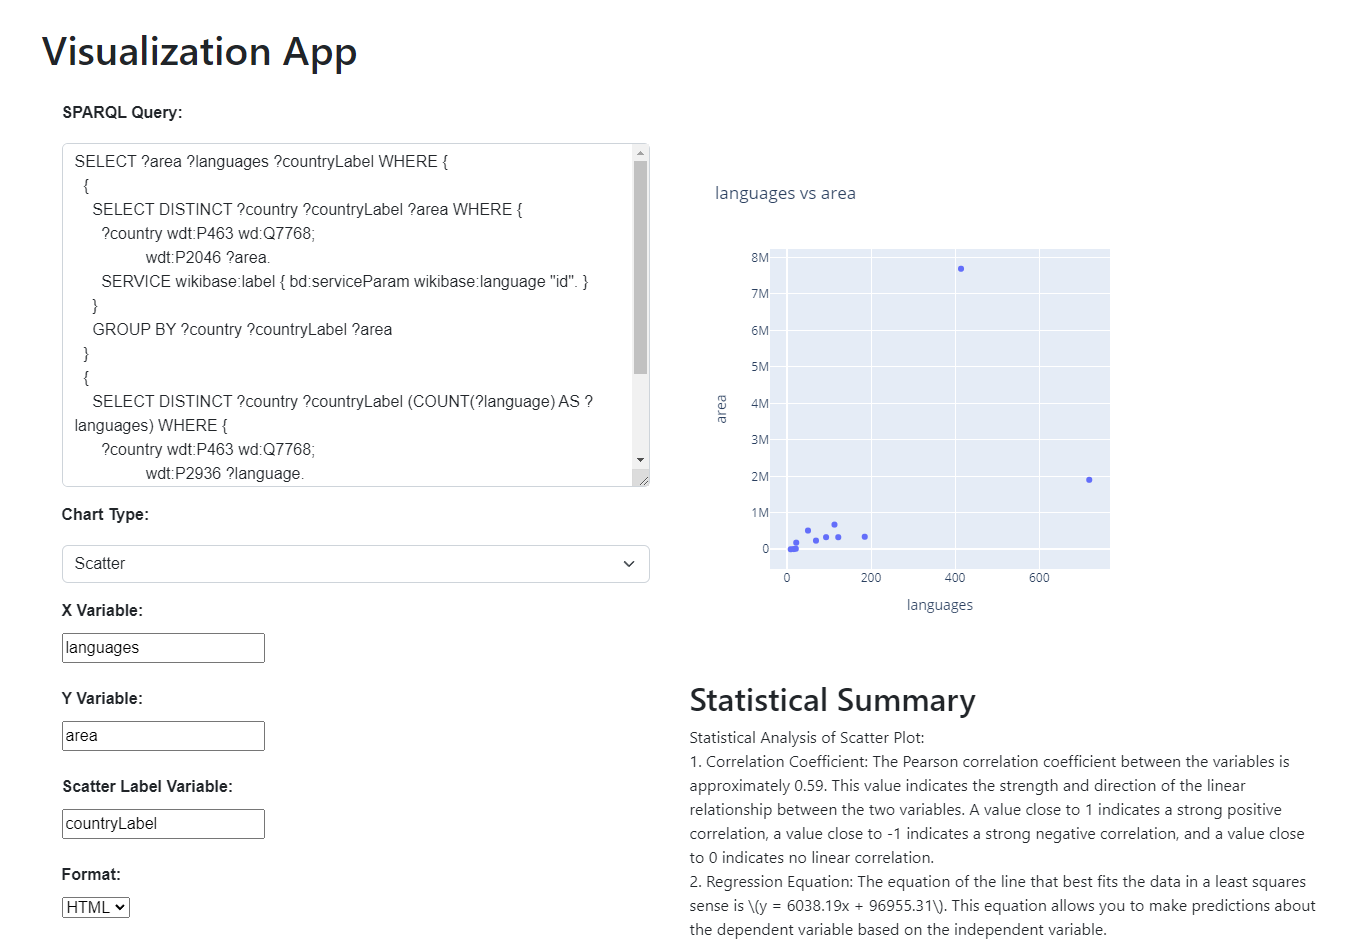

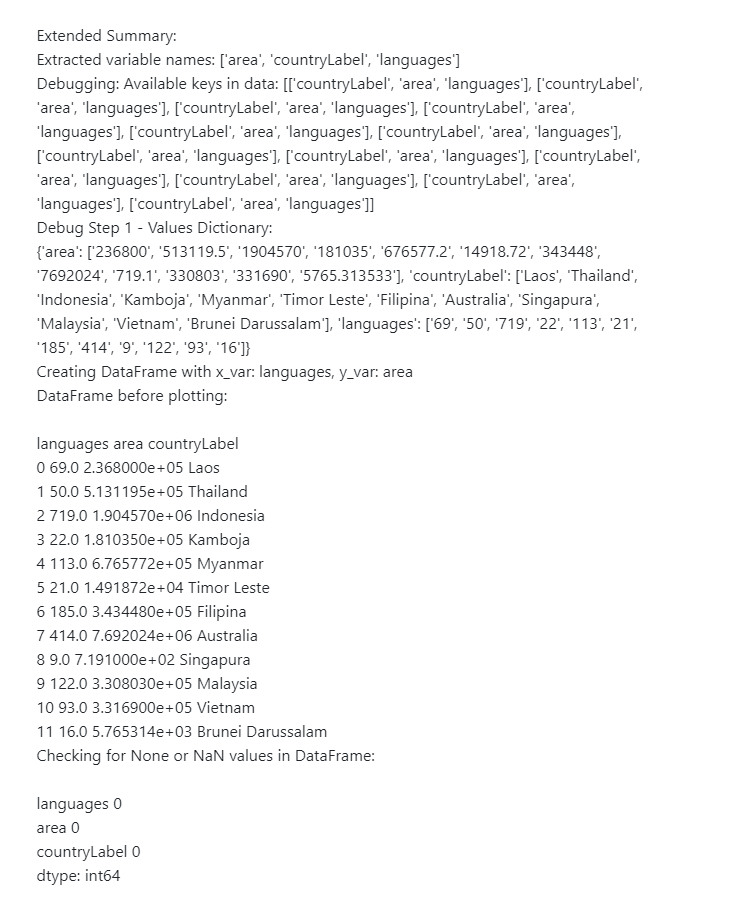